<a href="https://colab.research.google.com/github/Maryem-bencharke/1st_Django_Project-1/blob/master/Maryem_BENCHARKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEVOIR N°2


Vous devez compresser le dossier contenant vos réponses et le nommer par <strong>Your_Name_FirstName.zip</strong> et envoyez-le à mon adresse gamil: red.ezzahir 


Vous devez également remettre le devoir en format papier 

# Question 1 (5pts)

Décrire en 30 lignes maximum le principe des algorithmes génétiques ?
vous pour insert 4 images au maximum (voir en bas comment l'image est inserée)

**Description de l'ALGORITHME GENETIQUE**

L’Algorithme Génétique est un algorithme d’optimisation qui s’inspire du processus d’évolution des êtres vivants. Il fut développé par le scientifique américain John Henry Holland dans les années 1970.

***Les principes de l’Algorithme Génétique ***

L’Algorithme Génétique se base au départ sur une population de solutions candidates appelées parfois individus, créatures, phénotypes qui va évoluer de génération en génération jusqu’à la génération qui contient les meilleures solutions.

Chaque individu comprend des propriétés et il peut être sujet à des transformations génétiques (mutation, croisement par exemple).

Chaque individu est évalué et cette valeur d’aptitude (fitness value) est un critère pour sa survie d’une génération à une autre.


 Cet algorithme est une méthode d’optimisation qui s’adapte à la plupart des problèmes. Mais, ils existent d’autres algorithmes plus performants dits hybrides pour avoir des solutions qui se rapprochent beaucoup plus de l’optimum global.

Votre description ici.


Le code de ce devoir s'appuie sur la mise en œuvre que nous avons vue lors de travaux pratiques sur les algorithmes génétiques

In [119]:
from random import choices, choice, randint, randrange, shuffle, sample
from random import random as rnd
from typing import List, Optional, Callable, Tuple, Set
from copy import  deepcopy
from functools import partial,   reduce
from statistics import mean, stdev
import time 

Genome = List[int]
Chromosome = List[int] 
Population = List[Chromosome]
PopulateFunc = Callable[[], Population]
FitnessFunc = Callable[[Chromosome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Chromosome, Chromosome]]
CrossoverFunc = Callable[[Chromosome, Chromosome], Tuple[Chromosome, Chromosome]]
MutationFunc = Callable[[Chromosome], Chromosome]
PrinterFunc = Callable[[Population, int, FitnessFunc], None]



def generate_chromosome(genome: Genome,  chromosome_length=None) -> Chromosome:
    if  chromosome_length is None: 
        return choices(genome, k=len(genome))
    else:
        return choices(genome, k=chromosome_length)


def generate_population (size: int, genome: Genome,  chromosome_length=None ) -> Population: 
    population = []
    i = 0
    while len(population) < size:
        chromosome = generate_chromosome(genome, chromosome_length)
        if not chromosome in population or i == 10: 
            population.append(chromosome)
            i = 0
        else :
            i +=1
        
    return population



def single_point_crossover(a: Chromosome, b: Chromosome) -> Tuple[Chromosome, Chromosome]:
    if not len(a)==len(b):
        raise ValueError("The given chromosones don't have the same length!")
    r = randint(1, len(a)-1)  
    x, y = a.copy(), b.copy()  
    for i in range(r):
        x[i], y[i] = y[i], x[i]
    return x, y
        

def mutation(chromosome: Chromosome, genome: Genome, 
             probability: float = 0.2) -> Chromosome:
    """Mutate, usually with a low probability, the given chromosome. 
     @param chromosome: chromosome to mutate
     @param probability: probability that a mutation attempt will be successful
    """
    chromosome  = chromosome.copy() 
    r = rnd() 
    if r < probability:
        p = randrange(0, len(chromosome))
        x = choice(genome)
        while(x == chromosome[p]):
            x = choice(genome)
        
        chromosome[p]=x
    
    return chromosome


def population_fitness(population: Population, fitness_func: FitnessFunc) -> int:
    return reduce(lambda x, y: x+y, map(fitness_func, population))


def selection_pair(population: Population, fitness_func: FitnessFunc,  maximize: bool = False) -> Population:
    fitnesses= list(map(fitness_func, population))
    if not maximize : 
        maxi= max(fitnesses)
        fitnesses= map(lambda x: maxi-x+1, fitnesses)
    return  choices(population, weights=fitnesses,  k=2)
        

#help(sorted)
def sort_population(population: Population, 
                    fitness_func: FitnessFunc, 
                    maximize: bool=False) -> Population:
    return sorted(population, key = fitness_func, reverse=maximize)
    

def chromosome_to_string(chromosome: Chromosome) -> str:
    return ''.join(map(str,chromosome))


def print_statistics(population: Population, generation_id: int,  fitness_func: FitnessFunc):
    
    print("GENERATION %02d" % generation_id)
    print("=================")
    print("Population: [%s]" % ", ".join([chromosome_to_string(ch) for ch in population]))
    

    fitness = list(map(fitness_func, population))
    
    print("  Min %s" % min(fitness))
    print("  Max %s" % max(fitness))
    print("  Avg %s" % mean(fitness))
    print("  Std %s" % stdev(fitness))

     
        
def get_statistics(population: Population, generation_id: int,  fitness_func: FitnessFunc):  
    fitness = list(map(fitness_func, population)) 
    return generation_id,  min(fitness),  max(fitness),  mean(fitness), stdev(fitness)

     
    
def run_evolution(populate_func: PopulateFunc, fitness_func: FitnessFunc, 
                  fitness_limit: int, maximize: bool = False,
                  selection_func: SelectionFunc = selection_pair,
                  crossover_func: CrossoverFunc = single_point_crossover,
                  mutation_func: MutationFunc = mutation, generation_limit: int = 100,
                  printer: Optional[PrinterFunc] = None) -> Tuple[Population, int]:  
    
    #generate a population initial
    population = populate_func()
    # sort and assign the population 
    population = sort_population(population, fitness_func, maximize)
    # iterate until the generation_limit
    for i in range(generation_limit) : 
        # print the i^th generation if a printer is given
        if not printer is None:
            printer(population, i, fitness_func)
        
        # we break if the fitness_limit is reached, >=fitness_limit when maximization and <=fitness_limit for minimizatio
        best_fitness =fitness_func(population[0])
        if (maximize and best_fitness >= fitness_limit) \
                or (not maximize and best_fitness <= fitness_limit):
            break;
             
        # initialize next_generation by the two first individuals in the sorted population
        next_generation = [population[0], population[1]]
        while len(next_generation) < len(population): 
            # select  a pair of parents  uning selection_func and fitness_func 
            x, y = selection_func(population, fitness_func, maximize) 
            # call crossover_func to get offspring a, b from the parents
            a, b = crossover_func(x, y)
            # apply  mutation_func on each offspring 
            a = mutation_func(a)
            b = mutation_func(b)
            # increment the next generation 
            next_generation.append(a)
            next_generation.append(b)
            

        # population = next_generation
        population = next_generation
        # sort and assign the population 
        population = sort_population(population, fitness_func, maximize) 
        
    printer(population, i, fitness_func)
    best_fitness =fitness_func(population[0])
 
    return population, best_fitness, i
 

    


# Question 2 (3pts)
Dans ce problème, une fonction présentant plusieurs maxima locaux (ce qui rend inapplicables les algorithmes les plus simples de recherche de maximum) est définie sur un certain intervalle et le but est de déterminer à l'aide des algorithmes génétiques l'abscisse du maximum global (sur l'intervalle) de la fonction. On va donc utiliser une population dans laquelle chaque individu correspond à une abscisse située dans l'intervalle.

La fonction $g(x) =x^2cos(1/(10x))sin(x/10)/10$ à optimiser est présentée dans la figure suivante:



![gx-image.png](attachment:gx-image.png)

### Remarque :

l’étude d’une fonction à une variable n’a pour but uniquement la démonstration pédagogique et illustratif, puisque vous constaterez que le nombre total d'abscisses testées avant d'atteindre le maximum global (égal au nombre de générations multiplié par la taille de la  population) est généralement tel qu'on aurait un aussi bon résultat en répartissant simplement ce nombre d'abscisses uniformément sur l'intervalle puis en cherchant Max(f(Xi)). L'intérêt des algorithmes génétiques pour la recherche de maximum de fonction n'est en pratique réel que dans le cas d'une fonction à beaucoup de variables, car alors toute exploration systématique de l'espace des n-uplets possibles devient prohibitive, tandis qu'un algorithme génétique peut rester efficace. Malheureusement, la visualisation de la recherche du maximum d'une fonction à n variables est problématique pour n=2, et devient carrément impossible (ou en tout cas incompréhensible) pour n>=3...


### Codage du Chromosome

Une des premières questions qui se posent est celle du codage : à quelle séquence de gènes faire correspondre une abscisse de l'intervalle ? On peut faire le choix de prendre chaque gène égal à un bit (donc le génome original est 01), et de faire correspondre à chaque chromosome  (du type 10011100...) l'abscisse 
$x = xMin + N*(xMax - xMin)/Nmax $
où N est l'entier dont la représentation binaire est donnée par le chromosome, et Nmax est le plus grand entier représentable avec le nombre de bits correspondant à taille du chromosome. Il ne reste donc plus qu'à choisir le nombre de bits constituant le génome de chaque individu. 
 Nous nous intéressons à optimiser la fonction g(x) dans l’intervalle $I=[-255, 255]$.
 

### 2.1) Que représentent  xMin, et xMax.
 

In [120]:
xMin, xMax =  -255, 255
#xMin et xMax representent les bornes de notre intervalle où on peut optimiser notre fonctiong(x)


### 2.2)  Taille du chromosome 
Si la taille du chromosome est n bits,  donner Nmax:le nombre maximum du chromosone representables en fonction de n (noté bien que pour  8 bits =>  Nmax=256), puis déduire le nombre minimal de bits (n_min) constituant le chromosome de chaque individu pour pouvoir representer 8 individus entre chaque deux entiers de l’interval I (Le nombre total d'individus representable est donc (xMax - xMin + 1)*8.


In [121]:
#retourne l'entier maximum à représenter par n bits ()

def n_max(n) :
    return  2**n - 1

#retourne le nombre minimum de bits pour représenter N chromosomes (ce n'est pas pour représenter le nombre N)
def n_bits(N):
    return N.bit_length() 
      
#Donner Nmax en fonction de xMin et xMax si nous choisisions à representer 8 individus (ou 8 réels)
#entre chaque deux entiers dans l'interval xMin et xMax

Nmax =  n_max(n_bits((xMax - xMin)*8))

#déduire le nombre minimal de bits (n_min) constituant le chromosone d'un individu parmi les Nmax.
n_min = n_bits((xMax - xMin)*8)

 

print('Nmax=', Nmax)
print('n_min=', n_min) 

Nmax= 4095
n_min= 12


# Question 3 (3pts)
#### MAXIMIZING g(x) =x^2/10 cos(1/(10x))sin(x/10) USING GENETIC ALGORITHM 

##### 3.1) Ecrire la fonction genome_gx que retourne un genome composé de deux gènes 0 et 1

In [122]:
def genome_gx() -> Genome:
    return choices([0,1],k=12)
print(genome_gx())

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]


#### 3.2) En utilisant l'opérateur de décalage de bits +| ecrire la fonction qui convertie un chromosome  (liste binaire) en entier.


In [123]:
def chromosome_to_integer(Chromosome:Chromosome):
    res = 0
    for i in Chromosome:
        res = (res << 1) | i
    return res
chromosome_to_integer(genome_gx())

1078

#### 3.3) En utilisant la fonction précedente ecrire une fonction qui transforme un chromosome en un individus x (abscisse) $x = xMin + N*(xMax - xMin)/Nmax $, ou N est l'entier représenté par le chromosome.

In [124]:
def chromosome_to_x(Chromosome: Chromosome):
    x = xMin+((chromosome_to_integer(Chromosome))*(xMax-xMin))/Nmax
    return x
print(chromosome_to_x(genome_gx()))

-185.6300366300366


#### 3.4) En utilisant la fonction précedente ecrire la fonction gx qui retourne l'évaluation d'un chromosome par la fonction $g(x) =x^2cos(1/(10x))sin(x/10)/10$  attention! si x=0 return 0 pour eviter l'exception ZeroDivisionError

In [125]:
import numpy as np
def gx(Chromosome: Chromosome):
    x = chromosome_to_integer(Chromosome)
    try:
        g = (x**2)*(np.cos(1/(10*x)))*np.sin(x/10)/10
    except ZeroDivisionError:
        g=0 
    return g 
print(gx(genome_gx()))

-255786.45638215652


#### 3.5) En utilisant le moteur de recherche de google  (ecrire dans le champs de recherche l'expression x*x cos(1/(10x))sin(x/10)/10 ) verifier que la valeur minimale de g dans l'intervale $I$ est $-5555$ et mettre le boolean à True si oui.

In [126]:
verified = True

#### 3.6)  Ecrire la fonction fitenss_gx  qui retourne  (gx(chromosone) + 5555)/10

In [127]:
def fitness_gx(chromosome: Chromosome):
    return (gx(chromosome)+5555)/10
print(fitness_gx(genome_gx()))

77494.09378633539


#### 3.7)  Expliquer pourquoi nous avons ajouté 5555 à gx et pour quel raison nous avons divisé par 10

votre réponse ici:

on a la valeur minimal de g(x) sur l'intervalle I est -5555, et on veut que g(x)-min>0 
pour cela on a ajouter 5555 

#### 3.8) Quelle est la valeur max du fitness_gx  ( ) si le max de g(x) dans I est 5555

In [128]:
FITNESS_LIMIT = (5555+5555)/10
print(FITNESS_LIMIT)

1111.0


#### 3.9) C'est le temps de tester l'agorithme genetique sur g(x) 

In [129]:
POPULATION_SIZE = 4
MUTATION_RATE = 0.15
GENERATION_LIMIT =  1000


In [130]:
def run_genetic(): 
    start = time.time()
    population, best_f, generations =  run_evolution(
            populate_func=partial(generate_population, size=POPULATION_SIZE, genome=genome_gx(), chromosome_length=n_bits(Nmax)),
            fitness_func=fitness_gx, mutation_func=partial(mutation, genome=genome_gx(), probability=MUTATION_RATE),
            fitness_limit=FITNESS_LIMIT, crossover_func=single_point_crossover,
            printer=print_statistics, maximize=True,
            generation_limit=GENERATION_LIMIT) 
    end = time.time() 
    elapsed_time=(end - start)
    generation_id,  min_fit ,  max_fit ,  avg_fit , stdev_fit  = \
                                    get_statistics(population, generations, fitness_func=fitness_gx )
    
    return generation_id, chromosome_to_x(population[0]), min_fit,  max_fit, avg_fit,  stdev_fit,  elapsed_time


gen_i, x,  min_fit,  max_fit, avg_fit, stdev_fit, t = run_genetic()
print("x qui maximise g {:.2f}".format(x))
print("g( {:.2f} )= {:.2f}".format(x, (x * x * np.cos(1 / (10. * x)) * np.sin(x / 10.) / 10.)))
print("fitness de x : {:.2f}".format(max_fit))
print("nombre de generations:", gen_i)
print("la moyen des fitness de la generation ", gen_i, " est {:.2f}".format(avg_fit))
print("Le temps d'execution est  {:.3f}".format(t))


GENERATION 00
Population: [111001111110, 000110000000, 000010100100, 001010100000]
  Min -3695.402473820314
  Max 40186.77380063075
  Avg 9595.421269929453
  Std 20516.34363628358
GENERATION 00
Population: [111001111110, 000110000000, 000010100100, 001010100000]
  Min -3695.402473820314
  Max 40186.77380063075
  Avg 9595.421269929453
  Std 20516.34363628358
x qui maximise g 207.05
g( 207.05 )= 4114.36
fitness de x : 40186.77
nombre de generations: 0
la moyen des fitness de la generation  0  est 9595.42
Le temps d'execution est  0.006



# Question 4 (3pts)

L'impact du nombre d'individus de la population sur la convergence:
si celui-ci est trop petit, il faut beaucoup plus de générations pour atteindre le maximum, car il n'y a pas assez de variété dans la population initiale, et seules les mutations finissent par permettre à l'algorithme de converger.

En suivant le schema suivant (Même principe utilié en devoir pour collecter et plotter des résultats) :

Initialisez un Tableau des resultats  (Results)

Pour POPULATION_SIZE allons de 2 jusqu'à 20 faire

    pour i alons de 1 jusqu'à 100 faire
        executez la fonction run_genetic() 
        les resultats sont collecter dans une liste 
    
    calculez les moyennes sur les 100 executions uiliser le module statistic vois plus haut
    et sauvgardez les dans le Tableau Results
    
Tracer les courbes des resultats (fitness, avg_fitness, generations, temps) en fonction de POPULATION_SIZE

Note: fitness et avg_fitness pouvent être tracées sur la même figure.

Commentez les courbes.



In [131]:
Results=[]
fitness = 0
avg_fitness = 0
generations = 0
tmp = 0
for POPULATION_SIZE in range(2,21):
    for i in range (100):
        generation_id, x,  min_fit,  max_fit, avg_fit, stdev_fit, tmp1=run_genetic()
        fitness +=max_fit
        avg_fitness +=avg_fit
        generations +=generation_id
        tmp +=tmp1
    Results.append([fitness/100,avg_fitness/100,generations/100,tmp/100])

Results

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 664
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 665
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 666
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 667
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 668
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 669
Population: [000001010000, 000000000000]
  Min 555.5
  Max 618.8188783159906
  Avg 587.1594391579953
  Std 44.77320823436276
GENERATION 670
Population: [000001

[[24779.776929513468, -4059.301964799305, 399.6, 1.5484726667404174],
 [55315.611218793805, -174.18962563722843, 400.0, 1.5590318202972413],
 [125255.68297792869, 6088.706412544489, 400.0, 1.5675084829330443],
 [180222.63702573176, 17526.326297949152, 400.2, 1.5756997108459472],
 [244745.64606024954, 18932.852384317965, 401.3, 1.5895145893096925],
 [302371.8128084654, 16619.170533280907, 401.3, 1.5968357563018798],
 [361658.11245839583, 18691.447188473114, 401.3, 1.6077577829360963],
 [441855.3009008025, 19491.791951679777, 401.3, 1.6162642002105714],
 [525884.3340750644, 13065.87100016431, 401.3, 1.6264947175979614],
 [598595.2348129827, 5657.563839416217, 401.3, 1.6325271129608154],
 [674938.8294905269, 3607.875551499687, 401.3, 1.643747091293335],
 [760774.1467906161, 633.1103022203257, 401.3, 1.654572057723999],
 [847206.8033659993, -5064.5231318671995, 401.3, 1.6612576484680175],
 [952692.3618621442, -11533.247942111308, 401.3, 1.672240686416626],
 [1061460.9491614639, -17315.4694

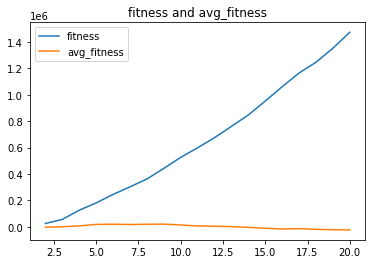

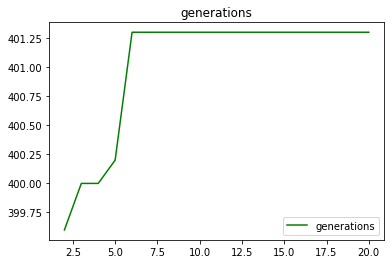

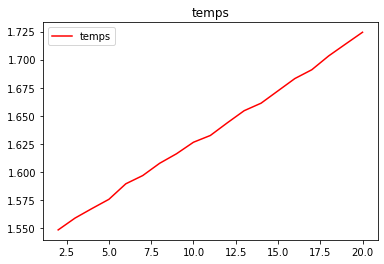

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

coord = pd.DataFrame(Results,columns=['fitness','avg_fitness','generations','temps'])
fitness = coord['fitness']
avg_fitness = coord['avg_fitness']
generations = coord['generations']
tmp = coord['temps']

population = list(range(2,21))
plt.plot(population,fitness,label = 'fitness')
plt.plot(population,avg_fitness,label = 'avg_fitness')
plt.legend()
plt.title("fitness and avg_fitness")
plt.show()

plt.plot(population,generations,label = 'generations',color='green')
plt.legend()
plt.title("generations")

plt.show()

plt.plot(population,tmp,label = 'temps',color='red')
plt.legend()
plt.title("temps")
plt.show()





# Question 5 (3pts)


L'influence de la taille du chromosome : si elle est trop faible, l'algorithme est susceptible de se bloquer dans un maximum local au lieu de converger vers le maximum global.

En suivant le même schema mais en fixant POPULATION_SIZE à la bonne valueur déduite de la question précedente (le cas écheant utiliser POPULATION_SIZE=6), et en variant 
Nmax sur [16, 32, 64, 128, 255, 1024, 2047]

Tracer les courbes des resultats (fitness, avg_fitness, generations, temps) en fonction de n_bits(Nmax)

Note: fitness et avg_fitness pouvent être ploté sur la même figure.

Commentez les courbes.




In [133]:
POPULATION_SIZE=6
Results = []
n = [16,31,63,127,255,1023,2047,4095]

for Nmax in n:
    fitness = 0
    avg_fitness = 0
    generations = 0
    tmp = 0
    for i in range(100):
        generation_id , x,  min_fit,  max_fit, avg_fit, stdev_fit, tmp1 = run_genetic()
        fitness += min_fit
        avg_fitness += avg_fit
        generations += generation_id
        tmp += tmp1
    Results.append([fitness/100,avg_fitness/100,generations/100,tmp/100])

Results


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  Avg 914.3628001998409
  Std 147.1037905292871
GENERATION 359
Population: [11001101, 11001101, 11001101, 11001101, 11001101, 11001100]
  Min 971.5737633337292
  Max 974.4176712041766
  Avg 973.943686559102
  Std 1.1610205263468862
GENERATION 360
Population: [11001101, 11001101, 11001101, 11001100, 11001100, 11001100]
  Min 971.5737633337292
  Max 974.4176712041766
  Avg 972.9957172689528
  Std 1.5576724921105338
GENERATION 361
Population: [11001101, 11001101, 11001101, 11001101, 11001100, 11001100]
  Min 971.5737633337292
  Max 974.4176712041766
  Avg 973.4697019140275
  Std 1.4685877093854764
GENERATION 362
Population: [11001101, 11001101, 11001101, 11001101, 11001100, 11001100]
  Min 971.5737633337292
  Max 974.4176712041766
  Avg 973.4697019140275
  Std 1.4685877093854764
GENERATION 363
Population: [11001101, 11001101, 11001101, 11001101, 11001100, 11101101]
  Min -0.8457627084485466
  Max 974.41767120417

[[559.0477118897735, 559.3696509991008, 999.0, 4.4978148460388185],
 [557.9875131041713, 559.1186360766935, 999.0, 4.469000744819641],
 [555.8506263532429, 558.4800585295, 999.0, 4.4543733358383175],
 [572.7556615042654, 609.8549165685661, 999.0, 4.457679915428161],
 [761.530581732302, 915.5138472448765, 999.0, 4.468555808067322],
 [-3091.3772759550293, 617.9872880252581, 0.9, 0.011926794052124023],
 [-16161.807347872711, 2890.7386345592145, 0.0, 0.010278105735778809],
 [-69616.3897209556, -433.8201023181362, 0.3, 0.008825039863586426]]

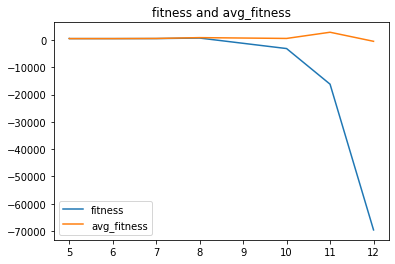

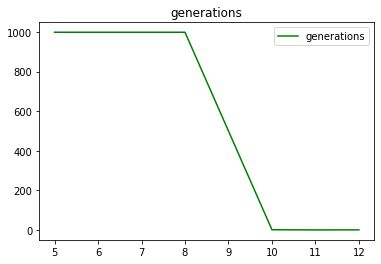

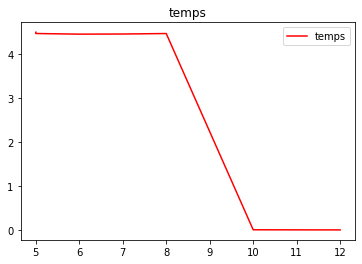

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

coord = pd.DataFrame(Results,columns=['fitness','avg_fitness','generations','temps'])
fitness = coord['fitness']
avg_fitness = coord['avg_fitness']
generations = coord['generations']
tmp = coord['temps']

N_bits = [n_bits(i) for i in n]
plt.plot(N_bits,fitness,label = 'fitness')
plt.plot(N_bits,avg_fitness,label = 'avg_fitness')
plt.legend()
plt.title("fitness and avg_fitness")
plt.show()

plt.plot(N_bits,generations,label = 'generations',color='green')
plt.legend()
plt.title("generations")

plt.show()

plt.plot(N_bits,tmp,label = 'temps',color='red')
plt.legend()
plt.title("temps")
plt.show()

# Question 6 (2pts)

#### MINIMIZING g(x) =x^2/10 cos(1/(10x))sin(x/10) USING GENETIC ALGORITHM 
reécrire les codes de la question 3 pour lancer un teste de minimization de g(x)

In [135]:
FITNESS_LIMIT =  0
POPULATION_SIZE = 4
MUTATION_RATE = 0.15
GENERATION_LIMIT =  1000

In [140]:
def run_genetic(): 
    start = time.time()
    population, best_f, generations =  run_evolution(
            populate_func=partial(generate_population, size=POPULATION_SIZE, genome=genome_gx(), chromosome_length=n_bits(Nmax)),
            fitness_func=fitness_gx, mutation_func=partial(mutation, genome=genome_gx(), probability=MUTATION_RATE),
            fitness_limit=FITNESS_LIMIT, crossover_func=single_point_crossover,
            printer=print_statistics, maximize=False,
            generation_limit=GENERATION_LIMIT) 
    end = time.time() 
    elapsed_time=(end - start)
    generation_id,  min_fit ,  max_fit ,  avg_fit , stdev_fit  = \
                                    get_statistics(population, generations, fitness_func=fitness_gx )
    
    return generation_id, chromosome_to_x(population[0]), min_fit,  max_fit, avg_fit,  stdev_fit,  elapsed_time


gen_i, x,  min_fit,  max_fit, avg_fit, stdev_fit, t = run_genetic()
print("x qui minimise g {:.2f}".format(x))
print("g( {:.2f} )= {:.2f}".format(x, (x * x * np.cos(1 / (10. * x)) * np.sin(x / 10.) / 10.)))
print("fitness de x : {:.2f}".format(max_fit))
print("nombre de generations:", gen_i)
print("la moyen des fitness de la generation ", gen_i, " est {:.2f}".format(avg_fit))
print("Le temps d'execution est  {:.3f}".format(t))


GENERATION 00
Population: [100000000100, 010100010100, 011100110100, 101101010000]
  Min -34795.994357216056
  Max 46058.599681402295
  Avg 6097.9781390321305
  Std 37478.04221409353
GENERATION 00
Population: [100000000100, 010100010100, 011100110100, 101101010000]
  Min -34795.994357216056
  Max 46058.599681402295
  Avg 6097.9781390321305
  Std 37478.04221409353
x qui minimise g 0.56
g( 0.56 )= 0.00
fitness de x : 46058.60
nombre de generations: 0
la moyen des fitness de la generation  0  est 6097.98
Le temps d'execution est  0.007


In [141]:
Results=[]
fitness = 0
avg_fitness = 0
generations = 0
tmp = 0
for POPULATION_SIZE in range(2,21):
    for i in range (100):
        generation_id, x,  min_fit,  max_fit, avg_fit, stdev_fit, tmp1=run_genetic()
        fitness +=max_fit
        avg_fitness +=avg_fit
        generations +=generation_id
        tmp +=tmp1
    Results.append([fitness/100,avg_fitness/100,generations/100,tmp/100])

Results

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 669
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 670
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 671
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 672
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 673
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Avg 37788.08260601647
  Std 30321.98927925806
GENERATION 674
Population: [010111111100, 101101010010]
  Min 16347.198367587296
  Max 59228.96684444564
  Av

[[24859.37757878152, 4325.659368812021, 199.8, 0.8330789804458618],
 [62733.010120030995, -11144.519305296526, 200.6, 0.8458997249603272],
 [112602.054598524, -15231.005019031607, 200.8, 0.8556491136550903],
 [154679.73716548795, -14354.026893873917, 200.8, 0.8652810335159302],
 [213950.5803385588, -21867.485182740107, 200.8, 0.8739007234573364],
 [283752.3341701884, -29359.9039427578, 200.8, 0.8831505537033081],
 [356443.55723109154, -30410.778743546856, 200.8, 0.8917287826538086],
 [422522.7442137965, -36006.65142072206, 200.8, 0.902323055267334],
 [520887.081331852, -35430.88032266103, 200.8, 0.9142434120178222],
 [596653.3118646116, -39473.6341195093, 200.8, 0.9237643718719483],
 [700029.4999240234, -31419.199581354194, 200.8, 0.9332776069641113],
 [792692.5746561467, -30629.036716711278, 200.8, 0.9410679578781128],
 [886998.1988012306, -33015.44247741669, 200.8, 0.9533615112304688],
 [990315.7663740518, -27556.722558871174, 200.8, 0.9625475645065308],
 [1103059.5436605741, -22854.